# Práctica 2: Modelo cinemático inverso de un manipulador y planteamiento de trayectoria

## Objetivo

El objetivo de esta práctica es que el alumno comprenda, interprete y modifique la información básica de los formatos de Universal Robot Description File (URDF).


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno grafique y analice los resultados del modelo

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
| ------:| -----------:|
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

<br>


| Elemento | Malo | Regular | Bueno |
| ------:| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Transformaciones homogéneas
Las transformaciones homogéneas permiten hacer el planteamiento del modelo cinemático de un robot, considerando las posiciones y orientaciones de las juntas del robot respecto al sistema de referencia de una junta anterior

Este planteamiento es el **modelo de cinemática directa**, que nos permite obtener la posición y velocidad del efector final de un manipulador en términos de los valores de la posición y velocidad de sus juntas (espacio de trabajo)

A través de este modelo se puede obtener el **modelo de cinemática inversa**, que permite obtener la velocidad de las juntas de un robot a partir de la velocidad deseada del efector final.

### Planteamiento de una trayectoria
Si se conoce el punto inicial y final de una trayectoria deseada, se pueden obtener los puntos intermedios de la trayectoria. La forma más fácil de realizar esta interpolación es a través de un spline. El orden del spline permitirá controlar las condiciones inicial y final de la posición, velocidad ó aceleración que tendrá el efector final durante el trayecto. 

Juntando la interpolación de la trayectoria y el modelo de la cinemática inversa, se pueden obtener todos los puntos intermedios de la trayectoria que deben seguir las juntas del robot para que el efector final siga una trayectoria.


# Cuestionario previo

**Responder de forma breve las siguientes preguntas:**

---

## ¿Qué son las transformaciones homogéneas?

Las **transformaciones homogéneas** se definen como matrices de dimensión **4×4** que permiten representar la transformación de un vector entre distintos sistemas de coordenadas. Estas matrices se utilizan principalmente en robótica, visión por computadora y gráficos 3D.

### Componentes de una matriz homogénea

Una matriz homogénea está compuesta por los siguientes elementos:

* 🔁 **Rotación (3×3)**: Representa la orientación del sistema de coordenadas.
* ➕ **Traslación (3×1)**: Indica el desplazamiento respecto a otro sistema de coordenadas.
* 📐 **Escalamiento (1×1)**: Factor de escala aplicado (usualmente 1 en transformaciones rígidas).
* 🔄 **Perspectiva (1×3)**: Se usa principalmente en gráficos 3D, rara vez en robótica.

### ¿Para qué se utilizan?

* ✅ Representar la **posición y orientación** de un sistema girado y trasladado respecto a un sistema fijo.
* 🔄 Transformar un **vector expresado en coordenadas móviles** a su representación en un sistema de referencia fijo.
* 🌀 **Rotar y trasladar** un vector con respecto a un sistema fijo.

---

## ¿Qué nos permite obtener el modelo de cinemática directa de un manipulador?

### Modelo Cinemático Directo (MCD) de un Robot

#### Pasos para obtener el MCD

##### 1. Asignación de sistemas de coordenadas

* Utilizar la **convención Denavit-Hartenberg (DH)** para asignar marcos de referencia a cada eslabón.
* **Ejes**:

  * $Z_i$: Alineado con el eje de la articulación $i+1$.
  * $X_i$: Perpendicular común entre $Z_{i-1}$ y $Z_i$.

##### 2. Parámetros Denavit-Hartenberg

Para cada articulación $i$, definir:

* $\theta_i$: Ángulo de la articulación (rotacional).
* $d_i$: Desplazamiento lineal (prismática).
* $a_i$: Longitud del eslabón (distancia entre ejes $Z$).
* $\alpha_i$: Ángulo de torsión (ángulo entre $Z_{i-1}$ y $Z_i$).

##### 3. Matrices de transformación homogénea

* Cada matriz $A_i$ relaciona el marco $i$ con $i-1$:

  $$
  A_i = \text{Rot}(Z, \theta_i) \cdot \text{Trans}(Z, d_i) \cdot \text{Trans}(X, a_i) \cdot \text{Rot}(X, \alpha_i)
  $$
* Forma general de $A_i$:

  $$
  A_i = \begin{bmatrix}
  \cos\theta_i & -\sin\theta_i \cos\alpha_i & \sin\theta_i \sin\alpha_i & a_i \cos\theta_i \\
  \sin\theta_i & \cos\theta_i \cos\alpha_i & -\cos\theta_i \sin\alpha_i & a_i \sin\theta_i \\
  0 & \sin\alpha_i & \cos\alpha_i & d_i \\
  0 & 0 & 0 & 1
  \end{bmatrix}
  $$

##### 4. Transformación total

* Multiplicar todas las matrices $A_i$:

  $$
  T = A_1 \cdot A_2 \cdot \ldots \cdot A_n
  $$
* $T$ es una matriz $4 \times 4$ que contiene:

  * **Orientación**: Submatriz superior $3 \times 3$.
  * **Posición**: Vector $3 \times 1$ en la última columna.

##### 5. Extracción de posición y orientación

* **Posición**: $(x, y, z) = [T_{14}, T_{24}, T_{34}]$.
* **Orientación**: Usar ángulos de Euler o cuaterniones según sea necesario.

---

## ¿Qué nos permite obtener el modelo de cinemática inversa de un manipulador?

El análisis del modelo de cinemática inversa nos permite determinar los **valores de las variables articulares** (como ángulos de las articulaciones o desplazamientos lineales) necesarios para que el efector final del manipulador alcance una **posición y orientación deseada** en el espacio.

Este modelo es esencial para resolver el problema de controlar un robot a partir de una ubicación objetivo.

A diferencia de la cinemática directa, que siempre tiene una solución única, la cinemática inversa puede presentar **múltiples soluciones**, una única solución, o incluso **ninguna solución**, dependiendo de la geometría del manipulador y del punto deseado. Por ello, su análisis requiere técnicas numéricas, métodos iterativos o el uso de algoritmos especializados.

---

## ¿De qué formas se puede interpolar la trayectoria de un efector final entre dos puntos?

La **interpolación de trayectorias** en robótica se refiere al proceso de generar una secuencia de posiciones intermedias que sigue el efector final (end-effector) de un manipulador para ir desde un **punto inicial** a un **punto final**. Esto es esencial para que el movimiento del robot sea **suave, predecible y seguro**.

### Tipos comunes de interpolación

#### 1. Interpolación en el espacio de las articulaciones (Joint Space Interpolation)

* Se calcula una trayectoria interpolando directamente los **valores de las variables articulares** (por ejemplo, ángulos de las juntas o desplazamientos).
* Se realiza la transición punto a punto controlando cada articulación individual.
* Es sencilla de implementar, pero puede generar movimientos poco intuitivos del efector final.

**Ventajas**:

* Menor complejidad computacional.
* Se respeta fácilmente la dinámica del robot.

**Desventajas**:

* El movimiento del efector final puede no ser lineal ni suave en el espacio cartesiano.

#### 2. Interpolación en el espacio cartesiano (Task Space Interpolation)

* La trayectoria se define directamente en el **espacio cartesiano**, es decir, se interpolan las posiciones y orientaciones deseadas del efector final.
* Se utiliza la **cinemática inversa** para convertir cada punto de la trayectoria en valores articulares.

**Tipos comunes**:

* Interpolación lineal: el efector sigue una línea recta.
* Interpolación circular: el efector sigue un arco de círculo definido por tres puntos.

**Ventajas**:

* Movimiento más intuitivo y controlado del efector.
* Útil en tareas que requieren precisión (soldadura, ensamblaje, etc.).

**Desventajas**:

* Más compleja computacionalmente.
* Puede generar trayectorias articulares más exigentes.

#### 3. Interpolación polinomial o por splines

* Se usan funciones matemáticas (como polinomios de tercer orden o splines cúbicos) para suavizar las trayectorias, evitando movimientos bruscos.
* Se puede aplicar tanto en el espacio articular como cartesiano.

**Ventajas**:

* Mayor suavidad y continuidad de velocidad y aceleración.
* Reducción de vibraciones o esfuerzos mecánicos.

**Desventajas**:

* Requiere mayor cálculo matemático y programación.



## Desarrollo

### 1. Planteamiento de la cinemática directa
En esta primera parte, se crearán las transformaciones homogéneas y el modelo de cinemática directa de un robot RRR, incluyendo la matriz del Jacobiano. Se recomienda usar **Sympy** para el planteamiento de las expresiones. 
Un diagrama del robot se muestra en la imagen:

<img src="images/p2_1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>

** Considerar valores cualesquiera para las dimensiones de los eslabones y la posición inicial de las juntas

In [1]:
#!/usr/bin/env python3 
from sympy import *
import matplotlib
import matplotlib.pyplot as plt
from generador_trayectoria_p2 import GeneradorTrayectoria

#Definicion de la clase generadora de trayectoria, aqui se incluyen todas las funciones para la cinematica directa e inversa 
class GeneradorTrayectoria():
  def __init__(self, dim = (0.3, 0.3, 0.3)):
    self.dim = dim
    #Definicion general de la matriz de transformacion homogenea del robot 
  def trans_homo(self, x, y, z, gamma, beta, alpha):
    R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
    R_y = Matrix([ [cos(beta), 0, -sin(beta)], [0, 1, 0],[sin(beta), 0, cos(beta)]])
    R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
    R = R_x * R_y *R_z
    p = Matrix([[x],[y],[z]])
    T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0,0,0,1]]))
    return T 
    #Deficion del vector de transformacion homogenea de cada punto relevante del robot desde el sistema cero al punto del efector final
  def cinematica_directa(self):
    print("Generando cinematica directa")
    self.theta_0_1, self.theta_1_2, self.theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
    #Matrices de transformación
    self.T_0_1 = self.trans_homo(0, 0, 0, pi/2, 0, self.theta_0_1)
    self.T_1_2 = self.trans_homo(self.dim[0], 0, 0, 0, 0, self.theta_1_2)
    self.T_2_3 = self.trans_homo(self.dim[1], 0, 0, 0, 0, self.theta_2_3)
    self.T_3_P = self.trans_homo(self.dim[2], 0, 0, 0, 0, 0)
    self.T_0_P = simplify(self.T_0_1 * self.T_1_2 * self.T_2_3 * self.T_3_P)
    #Vector de postura xi = [x z th]
    self.xi_0_P = Matrix([[self.T_0_P[0, 3]],
                          [self.T_0_P[2, 3]],
                          [self.theta_0_1 + self.theta_1_2 + self.theta_2_3]])
  

### 2. Planteamiento de la trayectoria

En esta segunda parte, se planteará el código que permita definir los puntos intermedios de una trayectoria, la cual debe tener velocidades y aceleraciones nulas al inicio y al final. Se deben incluir también las gráficas de la posición, velocidad y aceleración del efector final. 

Calcular la trayectoria considerando de forma general tiempo de duración, puntos inicial y final, y con una tasa de muestreo de 30 muestras por segundo. 

In [2]:
#Inicializacion de los puntos iniciales del sistema asi como sus posiciones
def generar_trayectoria(self, q_in = (pi/8, pi/6, pi/4), xi_fn = (0.3, 0.2, 0.1), tie = (0, 2), frec = 30):
    print("Creando trayectoria")
    self.t, self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5 = symbols(
    "t a_0 a_1 a_2 a_3 a_4 a_5") 

    self.lam = self.a_0 + self.a_1 * self.t + self.a_2 * (self.t)**2 + self.a_3 * (self.t)**3 + self.a_4 * (self.t)**4+ self.a_5 * (self.t)**5
    self.lam_dot = diff(self.lam, self.t)
    self.lam_dot_dot = diff(self.lam_dot, self.t)

    ec_1 = self.lam.subs(self.t, tie[0])
    ec_2 = self.lam.subs(self.t, tie[1]) - 1
    ec_3 = self.lam_dot.subs(self.t, tie[0])
    ec_4 = self.lam_dot.subs(self.t, tie[1])
    ec_5 = self.lam_dot_dot.subs(self.t, tie[0])
    ec_6 = self.lam_dot_dot.subs(self.t, tie[1])
    terminos = solve([ec_1, ec_2, ec_3, ec_4, ec_5, ec_6], [self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5], dict = True)
    self.lam_s          = self.lam.subs(terminos[0])
    self.lam_dot_s      = self.lam_dot.subs(terminos[0])
    self.lam_dot_dot_s  = self.lam_dot_dot.subs(terminos[0])

    # Calculo de la posicion inicial del efector final a partir del vector de postura
    xi_in = self.xi_0_P.subs({
      self.theta_0_1: q_in[0],
      self.theta_1_2: q_in[1],
      self.theta_2_3: q_in[2]
    })

    # Posiciones de espacio de trabajo
    self.xi = xi_in + Matrix([
      [self.lam_s * (xi_fn[0] - xi_in[0])],
      [self.lam_s * (xi_fn[1] - xi_in[1])],
      [self.lam_s * (xi_fn[2] - xi_in[2])]
    ])
    
    # Velocidades de espacio de trabajo
    self.xi_dot = Matrix([
      [self.lam_dot_s * (xi_fn[0] - xi_in[0])],
      [self.lam_dot_s * (xi_fn[1] - xi_in[1])],
      [self.lam_dot_s * (xi_fn[2] - xi_in[2])]
    ])

    # Aceleraciones de espacio de trabajo
    self.xi_dot_dot = Matrix([
      [self.lam_dot_dot_s * (xi_fn[0] - xi_in[0])],
      [self.lam_dot_dot_s * (xi_fn[1] - xi_in[1])],
      [self.lam_dot_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    print("Vector segunda derivada")
    
    #Muestreo del vector de la segunda derivada, oculto para fines esteticos de impresion del programa
    """print(self.xi)
    print(self.xi_dot)
    print(self.xi_dot_dot)"""

    print("Muestreando trayectoria")

    # Número de muestras e incremento de tiempo
    self.muestras = int(frec * (tie[1] - tie[0]) + 1)
    self.dt = 1.0 / frec

    # Muestreo de tiempo entre tf y ti
    self.t_m = Matrix.zeros(1, self.muestras)
    self.t_m[0,0] = tie[0]
    for a in range(self.muestras - 1):
      self.t_m[0, a + 1] = self.t_m[0, a] + self.dt

    self.xi_m         = Matrix.zeros(3, self.muestras)
    self.xi_dot_m     = Matrix.zeros(3, self.muestras)
    self.xi_dot_dot_m = Matrix.zeros(3, self.muestras)

    xi_m_func =         lambdify([self.t], self.xi)
    xi_dot_m_func =     lambdify([self.t], self.xi_dot)
    xi_dot_dot_m_func = lambdify([self.t], self.xi_dot_dot)

    #Interaciones del calculo de la trayectoria en donde muestras depende de la tasa de muestreo definida previamente 
    for a in range(self.muestras):

      self.xi_m[:, a]         = xi_m_func(float(self.t_m[0, a]))
      self.xi_dot_m[:, a]     = xi_dot_m_func(float(self.t_m[0, a]))
      self.xi_dot_dot_m[:, a] = xi_dot_dot_m_func(float(self.t_m[0, a]))
      #print(a)

    self.q_in = q_in


GeneradorTrayectoria.generar_trayectoria = generar_trayectoria

### 3. Cinemática inversa
A partir del modelo de la cinemática directa, obtener la expresión e la cinemática inversa, que relacione las velocidades de las juntas del robot con la velocidad del efector final. Ya que el modelo de cinemática inversa sólo permite obtener velocidades, obtener también expresiones que permitan obtener la posición de las juntas y sus aceleraciones

In [3]:
#Funcion para calcular la cinematica inversa 
def cinematica_inversa(self):
    print("Calculando cinematica inversa")
    # Variables para los valores de las velocidades del ws
    self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot = symbols(
    "x_0_P_dot z_0_P_dot theta_0_P_dot")
    # Derivada del vector de postura en términos de las velocidades del efector final
    # xi' = [x' z' th'] 
    self.xi_dot = Matrix([[self.x_0_P_dot], [self.z_0_P_dot], [self.theta_0_P_dot]])
    # Jacobiano
    self.J = Matrix.hstack(diff(self.xi_0_P, self.theta_0_1), 
                           diff(self.xi_0_P, self.theta_1_2), 
                           diff(self.xi_0_P, self.theta_2_3))
    self.J_inv = self.J.inv()
    # De la primera derivada, despejamos q': 
    # xi' = J * q'
    # q' = J-1 * xi'
    self.q_dot = self.J_inv * self.xi_dot

    # Crear una función a partir de la expresión simbólica
    q_dot_func = lambdify([self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot, self.theta_0_1, self.theta_1_2, self.theta_2_3], self.q_dot)

    # Matrices vacías para los valores de espacio de las juntas
    self.q_m         = Matrix.zeros(3, self.muestras)
    self.q_dot_m     = Matrix.zeros(3, self.muestras)
    self.q_dot_dot_m = Matrix.zeros(3, self.muestras)
    # Agregando posición inicial (dato)
    self.q_m[:,0] = Matrix([[self.q_in[0]], [self.q_in[1]], [self.q_in[2]]])
    # Agregando velocidad inicial
    # q' = J-1 * xi' => Obtenemos velocidad de las juntas 
    # en el punto actual sustituyendo velocidad actual del efector y 
    # posición actual de las juntas

    self.q_dot_m[:, 0] = q_dot_func(
        float(self.xi_dot_m[0, 0]),
        float(self.xi_dot_m[1, 0]),
        float(self.xi_dot_m[2, 0]),
        float(self.q_m[0, 0]),
        float(self.q_m[1, 0]),
        float(self.q_m[2, 0])
    )

    print("Calculando puntos")
    for a in range(self.muestras - 1):
      # Posición de las juntas
      # Posición siguiente = posición actual + velocidad actual * dt 
      self.q_m[:,a+1] = self.q_m[:,a] + self.q_dot_m[:,a] * self.dt
      # Velocidad de las juntas 
      # Velocidad siguiente de las juntas a partir de velocidad siguiente del efector y posición siguiente de las juntas
      
      self.q_dot_m[:, a + 1] = q_dot_func(
        float(self.xi_dot_m[0, a + 1]),
        float(self.xi_dot_m[1, a + 1]),
        float(self.xi_dot_m[2, a + 1]),
        float(self.q_m[0, a + 1]),
        float(self.q_m[1, a + 1]),
        float(self.q_m[2, a + 1]))
        
      # Aceleración
      # Aceleración actual = velocidad siguiente - velocidad actual / dt
      self.q_dot_dot_m[:,a] = (self.q_dot_m[:,a+1] - self.q_dot_m[:,a]) / self.dt

      #print("Iteración: " + str(a))
    # Aceleración final (cero)
    self.q_dot_dot_m[:, self.muestras - 1] = Matrix.zeros(3, 1)

GeneradorTrayectoria.cinematica_inversa = cinematica_inversa

### 4. Aplicación de la cinemática inversa
Finalmente, a partir de los puntos de la trayectoria y el modelo de cinemática inversa, obtener las posiciones, velocidades y aceleraciones de las juntas del robot, así como sus gráficas en función del tiempo

In [4]:
# Funciones para graficar el comportamiento del robot, primero se muestran las graficas de cada uno de 
# los efectores, mostrando su posicion, velocidad y aceleracion, posteriormente se imprime el espacio 
# de trabajo y finalmente la trayectoria total del robot 


def graficar(self):
    fig, ((xi_g, xi_dot_g, xi_dot_dot_g),
              (q_g, q_dot_g, q_dot_dot_g)) = plt.subplots(nrows=2, ncols = 3)
    # Posiciones ws
    xi_g.set_title("Posiciones de WS")
    xi_g.plot(self.t_m.T, self.xi_m[0, :].T, color = "YELLOW")
    xi_g.plot(self.t_m.T, self.xi_m[1, :].T, color = "GREEN")
    xi_g.plot(self.t_m.T, self.xi_m[2, :].T, color = "BLUE")

    # Velocidades ws
    xi_dot_g.set_title("Velocidades de WS")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[0, :].T, color = "YELLOW")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[1, :].T, color = "GREEN")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones ws
    xi_dot_dot_g.set_title("Aceleraciones de WS")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[0, :].T, color = "YELLOW")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[1, :].T, color = "GREEN")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[2, :].T, color = "BLUE")

    # Posiciones q
    q_g.set_title("Posiciones de q")
    q_g.plot(self.t_m.T, self.q_m[0, :].T, color = "YELLOW")
    q_g.plot(self.t_m.T, self.q_m[1, :].T, color = "GREEN")
    q_g.plot(self.t_m.T, self.q_m[2, :].T, color = "BLUE")

    # Velocidades q
    q_dot_g.set_title("Velocidades de q")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[0, :].T, color = "YELLOW")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[1, :].T, color = "GREEN")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones q
    q_dot_dot_g.set_title("Aceleraciones de q")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[0, :].T, color = "YELLOW")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[1, :].T, color = "GREEN")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[2, :].T, color = "BLUE")
    plt.show()
def graficar_ws(self):
    plt.plot(self.xi_m[0, :].T, self.xi_m[1, :].T, color = "CYAN")
    plt.axis((0, 1, 0, 1))
    plt.show()
def graficar_trayectoria(self):
    # Cinematica directa de cada sistema de referencia
    self.T_0_2 = self.T_0_1 * self.T_1_2
    self.T_0_3 = self.T_0_2 * self.T_2_3
    
    plt.plot(self.xi_m[0, :].T, self.xi_m[1, :].T)
    plt.axis((0, 1, 0, 1))
    plt.show()

GeneradorTrayectoria.graficar= graficar
GeneradorTrayectoria.graficar_ws = graficar_ws
GeneradorTrayectoria.graficar_trayectoria = graficar_trayectoria

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Muestreando trayectoria
Calculando cinematica inversa
Calculando puntos


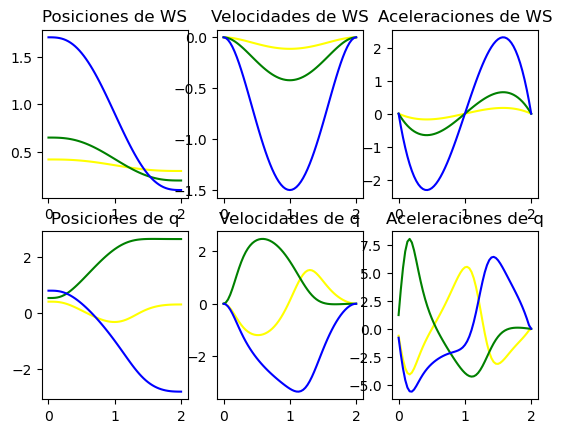

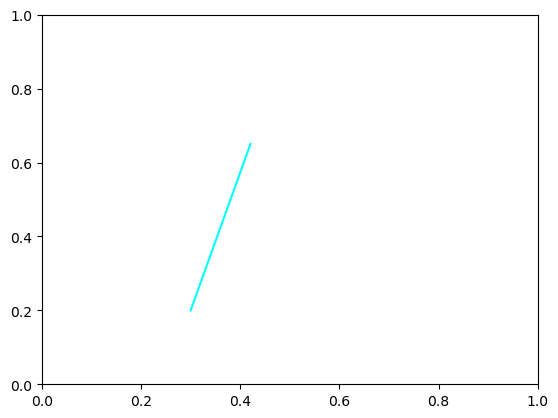

In [5]:
def main():
  generador_trayectoria = GeneradorTrayectoria()
  generador_trayectoria.cinematica_directa()
  generador_trayectoria.generar_trayectoria()
  generador_trayectoria.cinematica_inversa()
  generador_trayectoria.graficar()
  generador_trayectoria.graficar_ws()

if __name__ == "__main__":
  main()


### 5. Aplicación de la cinemática inversa
Para terminar, subir los archivos de la práctica al repositorio de github

## Análisis de resultados

## ¿Qué utilidad tiene el modelo de cinemática inversa de un robot?

En la práctica realizada, el modelo de **cinemática inversa** fue fundamental para determinar los **ángulos de las articulaciones** necesarios para que el efector final del robot llegue a una **posición deseada en el espacio**. Es decir, a partir de una ubicación objetivo, se resolvió matemáticamente cuáles deberían ser las configuraciones de las articulaciones del robot para lograrla. A su vez fue útil para **validar trayectorias mediante simulación** o **gráficas**, permitiendo comprobar que el robot podía alcanzar los puntos deseados antes de ejecutarlo físicamente.


## Conclusiones

> Respuesta

## Bibliografía 

- `[1]` H. Rodríguez, *Robótica: Transformaciones homogéneas y cinemática directa*, Universidad Tecnológica de la Mixteca. [En línea]. Disponible: <https://www.utm.mx/~hugo/robot/Robot2.pdf>. [Accedido: 17 de mayo de 2025].

- `[2]` "Transformación de matrices homogéneas," CIDECAME-UAEH. [En línea]. Disponible: <http://cidecame.uaeh.edu.mx/lcc/mapa/PROYECTO/libro39/321_transformacin_de_matrices_homogneas.html>. [Accedido: 17 de mayo de 2025].

- `[3]` "Transformaciones geométricas en robótica," Departamento de Neurobiología y Robótica, Universidad Miguel Hernández, 2012. [En línea]. Disponible: <https://nbio.umh.es/files/2012/04/practica5.pdf>. [Accedido: 17 de mayo de 2025].
